In [1]:
%pylab inline
from matplotlib import pyplot as plt
import seaborn as sns
import pytraj as pt
import os
from MMPBSA_mods import API
import pandas as pd 
import numpy as np
import statistics

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
total_pb=np.array([])
total_gb=np.array([])
total_vdw=np.array([])
total_EEL=np.array([])
total_EPB=np.array([])
total_ENPOLAR=np.array([])
for i in range(1,201):               #could change i value here to change the result, drug molecule could probably escape the potential binding site 
    os.chdir(f"/Users/mingyu/MMPBSA/twoheme_rep3/%d_2/" %i)
    MMGBSA = API.load_mmpbsa_info("_MMPBSA_info")
    totalpb=MMGBSA["pb"]["complex"]["TOTAL"] - MMGBSA["pb"]["receptor"]["TOTAL"] - MMGBSA["pb"]["ligand"]["TOTAL"]
    total_pb=np.concatenate([total_pb,totalpb])
    
    totalgb=MMGBSA["gb"]["complex"]["TOTAL"] - MMGBSA["gb"]["receptor"]["TOTAL"] - MMGBSA["gb"]["ligand"]["TOTAL"]
    total_gb=np.concatenate([total_gb,totalgb])
    
    totalvdw=MMGBSA["pb"]["complex"]["VDWAALS"] - MMGBSA["pb"]["receptor"]["VDWAALS"] - MMGBSA["pb"]["ligand"]["VDWAALS"]
    total_vdw=np.concatenate([total_vdw,totalvdw])
    
    totalEEL=MMGBSA["pb"]["complex"]["EEL"] - MMGBSA["pb"]["receptor"]["EEL"] - MMGBSA["pb"]["ligand"]["EEL"]
    total_EEL=np.concatenate([total_EEL,totalEEL])
    
    totalEPB=MMGBSA["pb"]["complex"]["EPB"] - MMGBSA["pb"]["receptor"]["EPB"] - MMGBSA["pb"]["ligand"]["EPB"]
    total_EPB=np.concatenate([total_EPB,totalEPB])

    totalENPOLAR=MMGBSA["pb"]["complex"]["ENPOLAR"] - MMGBSA["pb"]["receptor"]["ENPOLAR"] - MMGBSA["pb"]["ligand"]["ENPOLAR"]
    total_ENPOLAR=np.concatenate([total_ENPOLAR,totalENPOLAR])
print(total_pb) #using pb 
print(total_gb)
print(total_vdw)
print(total_EEL)
print(total_EPB)
print(total_ENPOLAR)
print('total van der Waals energy:',np.mean(total_vdw),'+-',(statistics.stdev(total_vdw)))
print('total Electrostatic energy:',np.mean(total_EEL),'+-',(statistics.stdev(total_EEL)))
print('total Polar solvation energy:',np.mean(total_EPB),'+-',(statistics.stdev(total_EPB)))
print('total Non-polar solvation energy:',np.mean(total_ENPOLAR),'+-',(statistics.stdev(total_ENPOLAR)))
print("total Energy:",np.mean(total_pb),'+-',(statistics.stdev(total_pb)))

[-47.3138 -51.3501 -51.0732 ... -53.4239 -53.4198 -42.7134]
[-50.93023216 -55.92668712 -53.57287816 ... -56.30228568 -58.07975832
 -48.45157064]
[-63.2068 -65.0195 -63.1598 ... -62.2665 -61.7384 -58.4673]
[-55.2676 -67.49   -68.2031 ... -74.6229 -84.4484 -77.8894]
[72.6758 81.2727 82.4861 ... 83.1718 93.9291 92.312 ]
[-5.6584 -5.7213 -5.7151 ... -5.649  -5.6774 -5.7511]
total van der Waals energy: -63.617984799999995 +- 3.768980089943701
total Electrostatic energy: -82.77385706666674 +- 13.089015614899981
total Polar solvation energy: 94.34436611666666 +- 12.484642928508146
total Non-polar solvation energy: -5.765048166666667 +- 0.19055022617345432
total Energy: -52.713634866666844 +- 4.922807516918867


Text(0, 0.5, ' ΔE mmpbsa ( kcal / mol)')

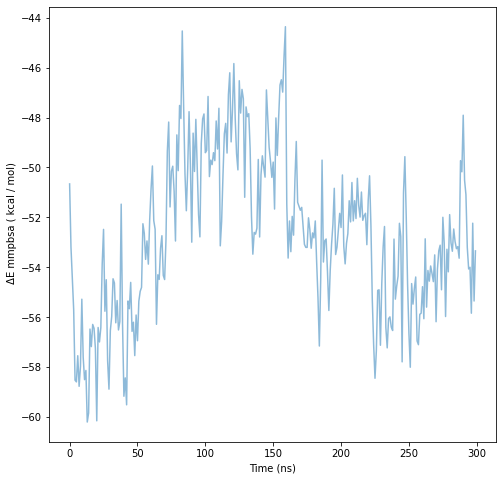

In [4]:
plt.figure(figsize = (8,8))
md_time= list(np.arange(0,300,0.05))
plt.plot(np.mean(total_pb.reshape(300,20), axis=1),alpha=0.5)


plt.xlabel('Time (ns)')
plt.ylabel(' \u0394E mmpbsa ( kcal / mol)')